In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG
from keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zalando-research/fashionmnist")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'fashionmnist' dataset.
Path to dataset files: /kaggle/input/fashionmnist


In [6]:
data_train_file = "/kaggle/input/fashionmnist/fashion-mnist_train.csv"
data_test_file = "/kaggle/input/fashionmnist/fashion-mnist_test.csv"

df_train = pd.read_csv(data_train_file)
df_test = pd.read_csv(data_test_file)

In [7]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Select all columns but the first
train_images = df_train[df_train.columns[1:]]
train_images.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
train_images.values.shape

(60000, 784)

In [15]:
# Select all columns but the first
test_images = df_test[df_train.columns[1:]]
test_images.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
labels_train = df_train['label']
labels_train.describe(include='all')

,label
count,60000.000000
mean,4.500000
std,2.872305
min,0.000000
25%,2.000000
50%,4.500000
75%,7.000000
max,9.000000


In [20]:
labels_test = df_test['label']
labels_test.describe(include='all')

,label
count,10000.000000
mean,4.500000
std,2.872425
min,0.000000
25%,2.000000
50%,4.500000
75%,7.000000
max,9.000000


In [21]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [22]:
train_images.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000077,0.0,0.0,...,0.000000,0.0,0.0,0.000461,0.000661,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000015,0.000031,0.0,0.0,0.000000,0.0,0.0,...,0.000046,0.0,0.0,0.000000,0.000000,0.000015,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [23]:
# Shape of the dataset
print('train_images shape:', train_images.shape)
print('train_labels shape:', labels_train.shape)
print('test_images shape:', test_images.shape)
print('test_labels shape:', labels_test.shape)

train_images shape: (60000, 784)
train_labels shape: (60000,)
test_images shape: (10000, 784)
test_labels shape: (10000,)


In [24]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

knn = KNeighborsClassifier()
knn.fit(train_images, labels_train)
y_pred = knn.predict(test_images)

print('Accuracy: ', accuracy_score(labels_test, y_pred))
print('Classification Report: \n', classification_report(labels_test, y_pred))

Accuracy:  0.8589
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.87      0.82      1000
           1       0.99      0.96      0.98      1000
           2       0.75      0.81      0.78      1000
           3       0.91      0.88      0.90      1000
           4       0.79      0.80      0.79      1000
           5       1.00      0.82      0.90      1000
           6       0.68      0.58      0.63      1000
           7       0.87      0.94      0.91      1000
           8       0.98      0.95      0.97      1000
           9       0.88      0.96      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



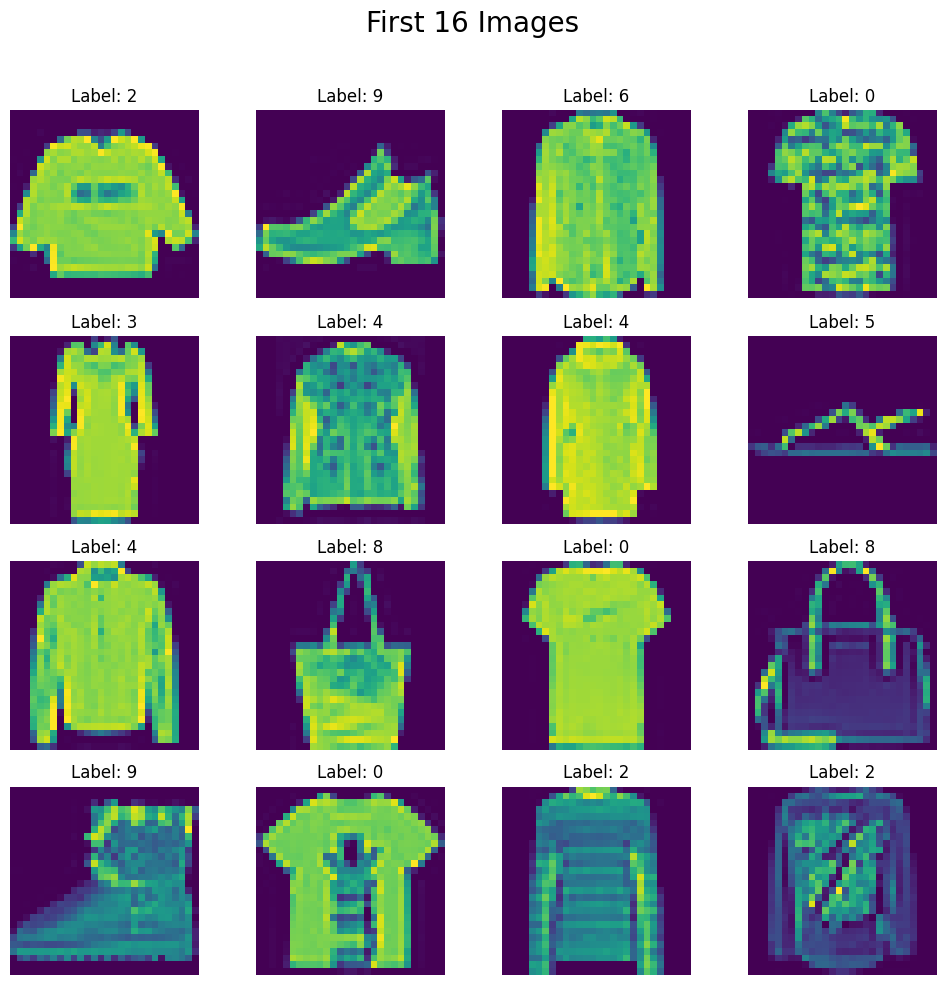

In [28]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df_train.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img)  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df_train.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

In [38]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

In [41]:
labels_train.value_counts().sort_index()

,count
label,
0,6000
1,6000
2,6000
3,6000
4,6000
5,6000
6,6000
7,6000
8,6000


In [43]:
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff
cm = confusion_matrix(labels_test, y_pred)
print(cm)

[[874   1  16  11   5   0  86   2   5   0]
 [  4 965   7  14   1   0   9   0   0   0]
 [ 18   0 808  14  98   0  61   0   1   0]
 [ 36  11  14 882  32   0  25   0   0   0]
 [  4   0  99  26 799   0  70   0   2   0]
 [  1   0   1   1   0 816   8  98   4  71]
 [202   1 114  16  74   0 583   0  10   0]
 [  0   0   0   0   0   1   0 945   0  54]
 [  2   1  14   2   6   1  13   5 953   3]
 [  0   0   0   0   0   2   0  34   0 964]]


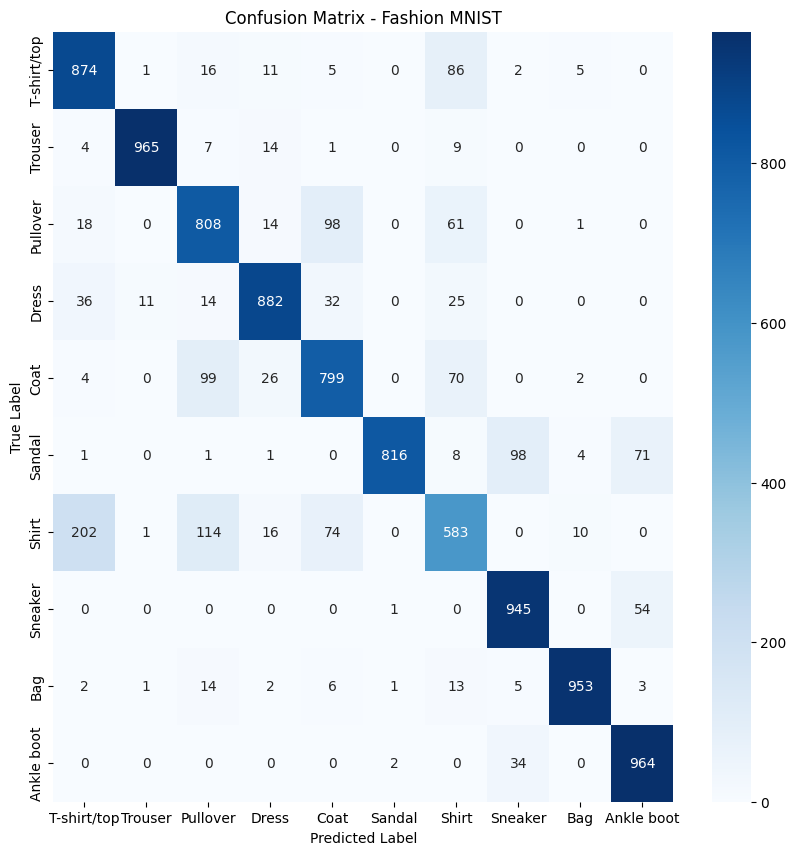

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Fashion MNIST")
plt.show()

In [50]:
# Random Forest

rf = RandomForestClassifier()
rf.fit(train_images, labels_train)

y_pred = rf.predict(test_images)
print('Accuracy: ', accuracy_score(labels_test, y_pred))
cm_rf = confusion_matrix(labels_test, y_pred)
print(cm_rf)

Accuracy:  0.882
[[860   0  14  26   1   1  86   0  12   0]
 [  2 973   4  15   2   1   3   0   0   0]
 [  7   1 804  11 111   0  58   0   8   0]
 [ 20   9  11 924  20   0  16   0   0   0]
 [  1   1  70  31 852   0  42   0   3   0]
 [  0   0   0   0   0 947   0  33   5  15]
 [169   1  98  29  81   0 608   0  14   0]
 [  0   0   0   0   0  16   0 932   0  52]
 [  1   1   7   0   3   1  11   3 973   0]
 [  0   0   0   0   0   7   1  42   3 947]]


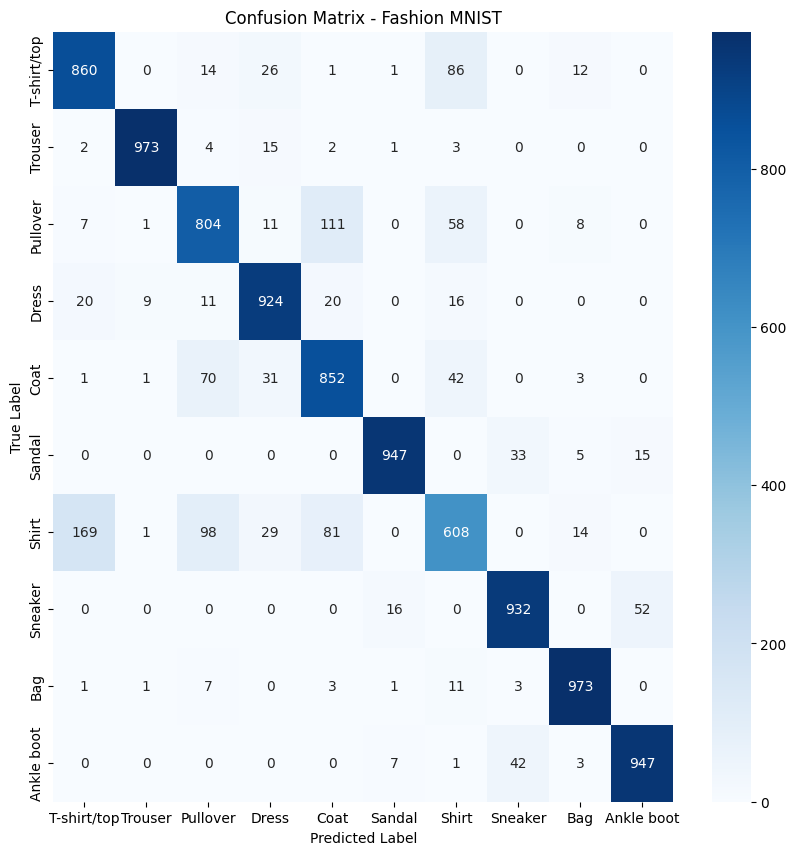

In [55]:
plt.figure(figsize=(10, 10))
sns.heatmap(
    cm_rf,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Fashion MNIST")
plt.show()

# Fully Connected Neural Network


In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(28*28,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = model.fit(train_images, labels_train, validation_split=0.2, epochs=20, batch_size=128)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.4522 - loss: 1.5465 - val_accuracy: 0.6935 - val_loss: 0.7886
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7317 - loss: 0.7357 - val_accuracy: 0.7620 - val_loss: 0.6649
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7657 - loss: 0.6434 - val_accuracy: 0.7765 - val_loss: 0.6053
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7877 - loss: 0.5847 - val_accuracy: 0.7958 - val_loss: 0.5548
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8092 - loss: 0.5250 - val_accuracy: 0.8136 - val_loss: 0.5110
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8205 - loss: 0.4940 - val_accuracy: 0.8183 - val_loss: 0.4959
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8327 - loss: 0.4693 - val_accuracy: 0.8254 - val_loss: 0.4786
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8392 - loss: 0.4480 - val_accurac

In [62]:
test_err, test_acc = model.evaluate(test_images, labels_test)
print('Accuracy: ', test_acc)
print('Accuracy: ', test_err)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8611 - loss: 0.3663
Accuracy:  0.8662999868392944
Accuracy:  0.36537912487983704




```
| Model                         | Accuracy (Test set) |
| ----------------------------- | ----------------- |
| **KNN**                       | 0.8589            |
| **Random Forest**             | 0.8820            |
| **Fully Connected NN (FCNN)** | 0.8663            |
